In [4]:
# Load libraries
import torch
import pandas as pd
from sklearn.model_selection import train_test_split

# Load Custom Library
from elevation_aware_ssl.ssl.simclr.dataset import CustomDataset
from elevation_aware_ssl.ssl.simclr.utils import visualize_augmented_images
from elevation_aware_ssl.trainer import Trainer


# import wandB
import wandb

wandb.login(key="wandb_key")

True

In [5]:
drive_path = '/content/drive/MyDrive' 
drive_path = "/media/omar/storage/gdrive"

In [7]:
#Load metadata
path_to_metadata =  f'{drive_path}/Maestria/Datasets/GeoDataset/metadata_v2/metadata.csv'
metadata = pd.read_csv(path_to_metadata).sample(frac=0.05, random_state=42)
print(metadata.shape)
metadata.head()

(2986, 10)


,Id,Elevation,Image,Mask,non_agricultural(km2),agricultural_frontier(km2),legal_exclusions(km2),non_agricultural,legal_exclusions,agricultural_frontier
27030,181810200900132113,"18NVN/18NVN_1_0/(200, 900)/elevation.tif","18NVN/18NVN_1_0/(200, 900)/chip.npy","18NVN/18NVN_1_0/(200, 900)/mask.tif",0.062,0.938,0.0,1,0,1
23748,181851400700132112,"18NVM/18NVM_5_1/(400, 700)/elevation.tif","18NVM/18NVM_5_1/(400, 700)/chip.npy","18NVM/18NVM_5_1/(400, 700)/mask.tif",0.504,0.496,0.0,1,0,1
11740,181828300900132015,"18NUP/18NUP_2_8/(300, 900)/elevation.tif","18NUP/18NUP_2_8/(300, 900)/chip.npy","18NUP/18NUP_2_8/(300, 900)/mask.tif",0.000,1.000,0.0,0,0,1
44886,181852800500132215,"18NWP/18NWP_5_2/(800, 500)/elevation.tif","18NWP/18NWP_5_2/(800, 500)/chip.npy","18NWP/18NWP_5_2/(800, 500)/mask.tif",0.000,0.000,1.0,0,1,0
4543,181894400300132012,"18NUM/18NUM_9_4/(400, 300)/elevation.tif","18NUM/18NUM_9_4/(400, 300)/chip.npy","18NUM/18NUM_9_4/(400, 300)/mask.tif",0.034,0.966,0.0,1,0,1


In [8]:
# path to image and masks
path_to_images = f"{drive_path}/Maestria/Datasets/GeoDataset/Dataset/"

## Create Datasets

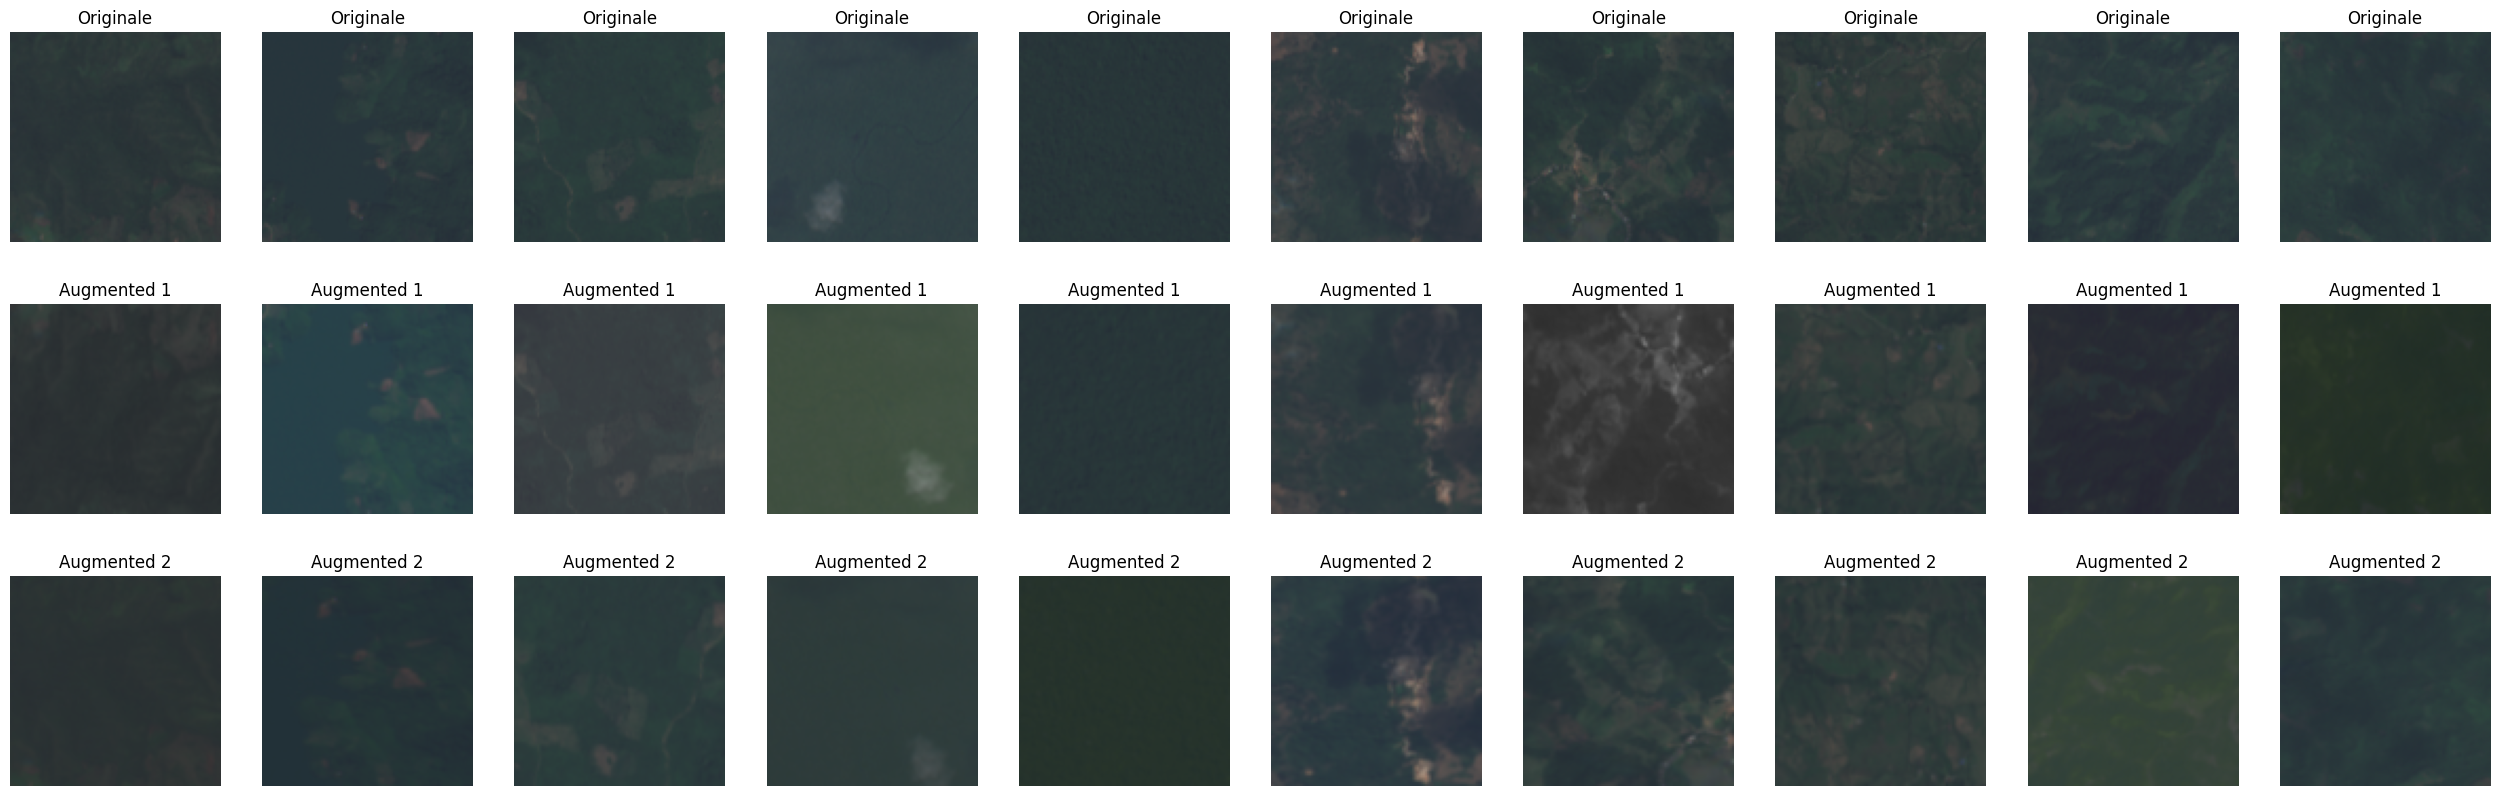

In [9]:
augment = {
    "horizontal_flip_prob": 0.5,
    "vertical_flip_prob": 0.5,
    "resize_scale": (0.7, 1.0),
    "resize_prob": 1.0,
    "brightness": 0.4,
    "contrast": 0.4,
    "saturation": 0.4,
    "hue": 0.2,
    "color_jitter_prob": 0.5,
    "gray_scale_prob": 0.2,
}

ds = CustomDataset(path_to_images, metadata.sample(10), return_original=True, augment=augment)
visualize_augmented_images(ds, brightness=0.1)

# Self-Supervised model

In [10]:
n = metadata.shape[0]
metadata_train = metadata.iloc[0:int(n*0.95)]
metadata_test = metadata.iloc[int(n*0.95):] 
print(metadata_train.shape)
print(metadata_test.shape)

(2836, 10)
(150, 10)


In [11]:
path_to_save_model = f"{drive_path}/Maestria/Theses/SSL/SimCLR/models/resnet18-v2"

In [16]:
metadata_kwargs = {
    "path_to_images": path_to_images,
    "path_to_save_model": path_to_save_model,  # path_to_save_model,  # Path to save the model that is being trained (do not include the extension .pt or .pth)
    "path_to_load_model": None,  # Path to load a model from a checkpoint (useful to handle notebook disconection)
    "metadata_train": metadata_train,
    "metadata_test": metadata_test,
    "num_workers": 6,
    "device": "cuda",
}


augment = {
    "horizontal_flip_prob": 0.5,
    "vertical_flip_prob": 0.5,
    "resize_scale": (0.7, 1.0),
    "resize_prob": 1.0,
    "brightness": 0.4,
    "contrast": 0.4,
    "saturation": 0.4,
    "hue": 0.2,
    "color_jitter_prob": 0.5,
    "gray_scale_prob": 0.2,
}

hypm_kwargs = {
    "version": "SSL-SimCLR-v2",
    "model_name": "SimCLR",
    "amount_ss_data": metadata_train.shape[0],
    "input_shape": 100,
    "backbone": "resnet18",
    "pretrained": False,
    "fine_tune": None,
    "tf_epoch": None,
    "in_channels": 3,
    "cifar": False,
    "normalizing_factor": 6000,
    "temperature": 0.5,  # Temperature hyperparameter used in the NTXenLoss function
    "weight_decay": 0.00005,
    "learning_rate": 1e-3,
    "train_batch_size": 128,
    "test_batch_size": 128,
    "epochs": 2,
    "augment_train": augment,
    "augment_test": augment,
}

wandb_kwargs = {
    "project": "SimCLR-SSL-v2",
    "entity": "omar_castano",
    "id": None,
    "name": "SSL-SimCLR",
    "resume": False,
}

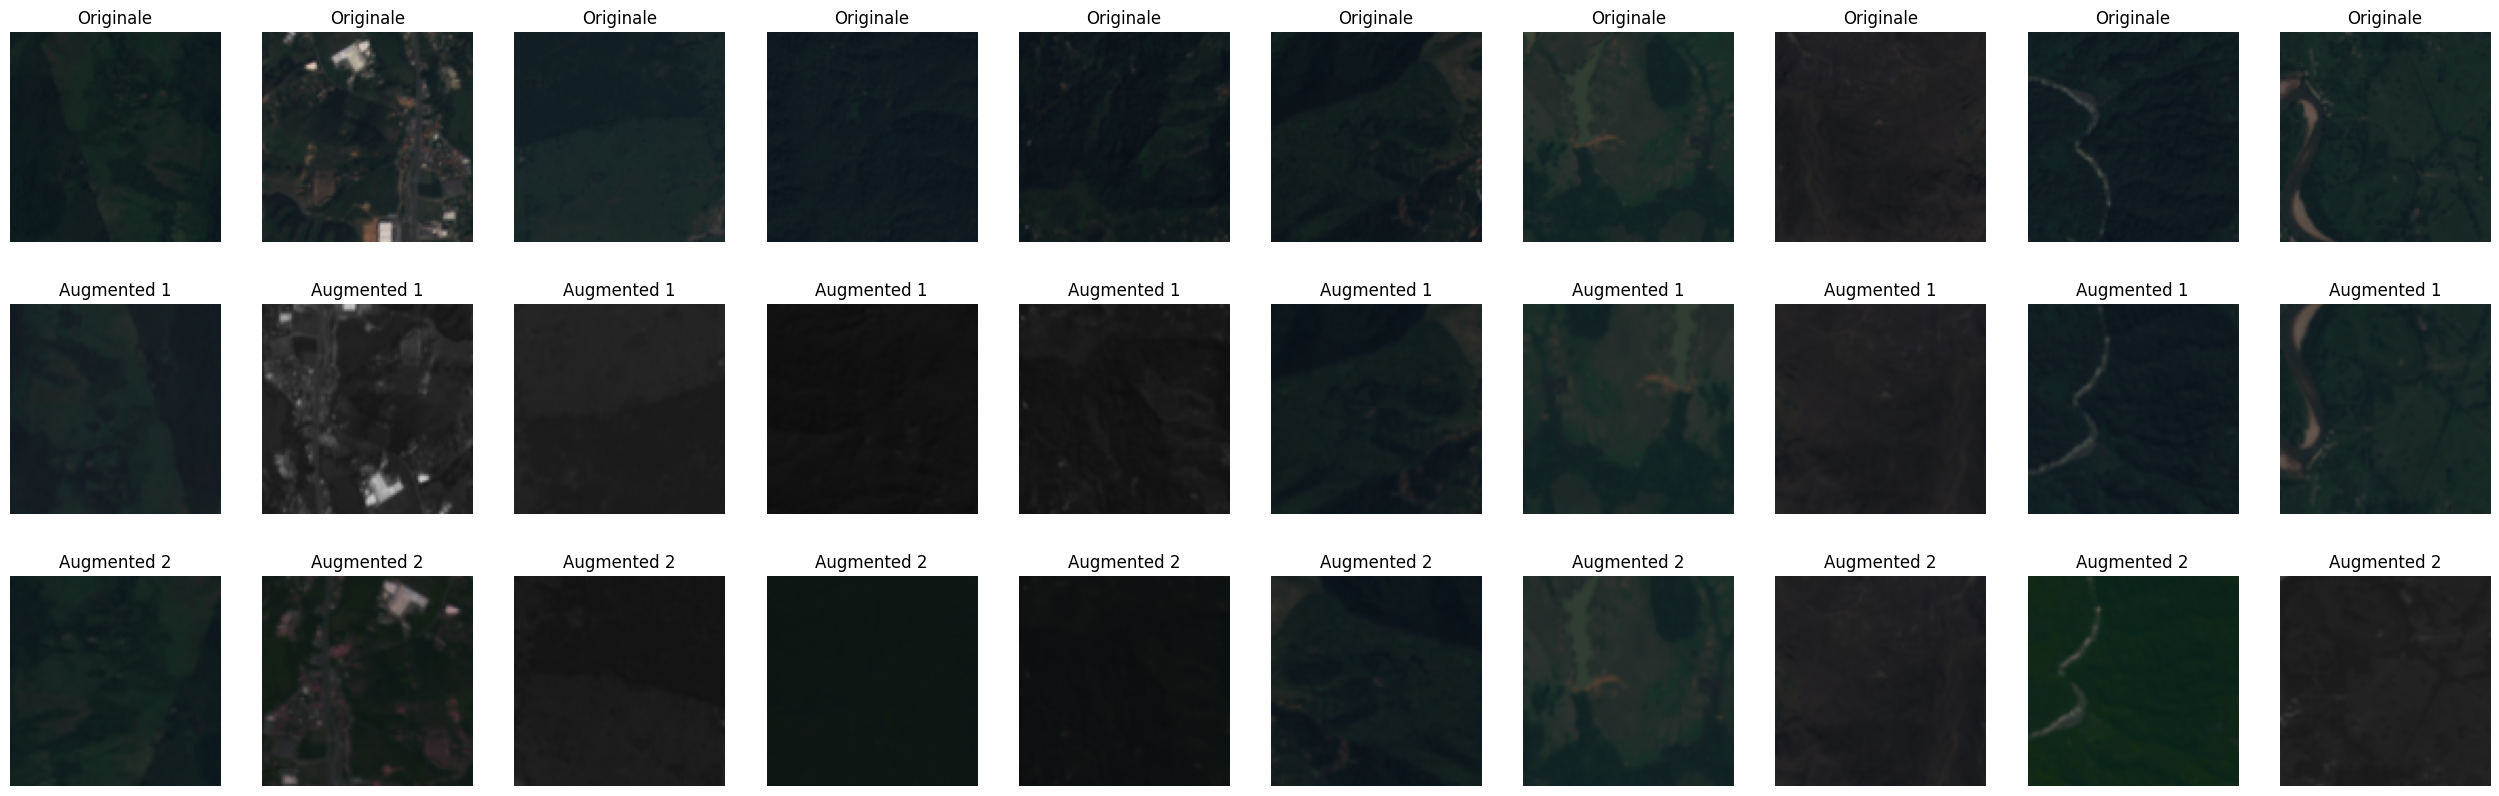

In [17]:
# Instance and configure the trainer class
trainer = Trainer(CustomDataset, visualize_augmented_images, wandb_kwargs, hypm_kwargs, metadata_kwargs)
trainer.configure_trainer()

In [18]:
trainer.fit()

--------------------
run_id 1crt9nw1
--------------------


Epoch 1/2 :   0%|          | 0/2 [00:00<?, ?it/s]

(Trai_loss:4.709): 100%|██████████| 22/22 [00:03<00:00,  5.67it/s]
